In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
#import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# fetch data 

overfit_data = pd.read_csv('Datasets/dont_overfit_competition.csv')

overfit_data.head()

id  target     0     1     2     3     4     5     6     7  ...   290  \
0   0    1.00 -0.10  2.17  0.68 -0.61  1.31 -0.46 -0.24  0.28  ...  0.87   
1   1    0.00  1.08 -0.97 -0.38  0.33 -0.43  0.32  1.17  0.35  ... -0.17   
2   2    1.00 -0.52 -0.09 -0.35  0.15 -0.02  0.40 -0.02 -0.17  ...  0.01   
3   3    1.00  0.07 -0.02  0.39 -1.64 -0.45 -0.72 -1.03  0.83  ... -0.40   
4   4    1.00  2.35 -0.83  0.51 -0.02  1.23  1.59  0.58  1.51  ...  0.90   

    291   292   293   294   295   296   297   298   299  
0  1.35  0.50 -0.65  0.67 -2.10  1.05 -0.41  1.04 -1.06  
1 -1.70 -1.26  1.36 -0.81 -1.62 -0.46 -1.10 -0.94  0.97  
2  0.26 -1.22  0.73  1.44 -1.17 -1.54  0.00  0.80 -1.21  
3  0.64 -0.59 -0.97  0.90  0.47 -0.56 -0.25 -0.53  0.24  
4  0.13  2.42 -1.00 -1.01  1.38  1.25  1.48  0.43  0.25  

[5 rows x 302 columns]

In [3]:
overfit_data.isna().sum().sum()


0

In [4]:
overfit_data.drop(columns = {'id'}, inplace = True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(overfit_data.drop(columns = ['target']), overfit_data['target'], stratify = overfit_data['target'], test_size=0.2, random_state=35)

X_train
X_test
y_train
y_test

0     1     2     3     4     5     6     7     8     9  ...   290  \
35   0.90  0.67  0.71 -1.74  0.77 -1.24 -0.35 -1.23  1.01 -1.22  ...  1.33   
236  0.07 -0.72  0.55  0.53  0.77 -1.25  1.06  0.58 -1.25  2.37  ...  1.18   
11  -1.84 -0.25 -0.49  1.74 -1.39 -0.69  0.87 -0.85  0.77  0.70  ...  0.13   
212 -0.47 -1.15  0.63 -2.29 -1.20 -0.89  0.54  1.17  0.64 -0.01  ... -0.40   
138  1.37 -0.51  0.76  0.29  0.04  0.26  1.93 -0.63  0.23  0.41  ... -0.82   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
128 -2.28 -0.47 -0.30  0.27 -0.50  1.31 -0.60  0.75  0.83 -1.41  ... -0.44   
48   0.97  0.98  1.92 -1.51  0.09 -0.18 -1.02 -0.05 -0.51  0.88  ...  0.99   
178 -0.03  0.37  2.04 -0.69  1.18 -2.49 -0.36 -0.44 -0.28 -1.53  ... -0.55   
218 -1.32 -2.38 -1.23 -0.55 -0.47  0.90  0.27 -1.38 -0.86 -1.92  ...  0.92   
226 -0.76  0.79  0.63 -1.23  1.17 -1.75 -0.93  1.07  0.28 -1.30  ...  0.06   

      291   292   293   294   295   296   297   298   299  
35   0.45 -0.72 -0.23  0.33  1.59 -1.01 -0.23 -0.01  0.14  
236 -0.29  0.32 -1.06  0.21  0.27 -0.78  0.69 -0.87  0.95  
11  -0.12  0.35  0.01 -0.72 -0.16  0.91  1.48 -1.87  0.04  
212  0.67  0.99  0.93  0.26 -0.34  0.01 -0.33  0.42  0.05  
138 -0.18  0.64 -0.62  1.07 -2.08 -0.62  0.49 -1.07 -2.39  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
128 -0.46  1.28 -0.09 -0.18 -0.18 -1.05 -1.40  0.36 -2.05  
48  -0.63 -1.61 -0.19 -1.52  0.68  0.86 -0.33  0.34  0.16  
178  2.64 -0.77  0.23  0.94  0.06  0.25 -0.23  0.76 -1.44  
218  0.41  0.30 -0.11 -1.06 -0.49  1.09 -0.66  0.07  1.74  
226  2.63 -0.21  0.27  0.32 -1.46 -0.91  1.23 -0.50 -1.53  

[200 rows x 300 columns]

0     1     2     3     4     5     6     7     8     9  ...   290  \
72   0.01 -1.95  0.59 -0.53 -1.42 -1.72 -0.70  0.74  1.02  0.09  ... -1.25   
69  -0.65  0.69  0.45 -1.49 -0.37  0.23 -1.10  0.46  1.07 -0.01  ...  0.98   
232 -0.61  0.25  1.18 -1.40 -2.08  1.70  0.19  1.21  0.57  0.15  ... -0.82   
39   0.74 -1.39  0.56 -0.89 -0.04  0.91  0.66  0.82 -0.80 -0.17  ...  1.11   
141  0.17  1.99  0.76 -1.41  0.57 -0.80 -0.24 -0.16  0.48  0.97  ...  0.94   
234 -1.53  0.32 -0.40 -0.12 -0.41  0.11  2.02 -0.43 -0.30 -0.04  ... -1.83   
47  -1.28  0.33 -0.81  1.69  1.58  0.08 -0.52 -0.08 -1.45  0.39  ...  0.67   
105  0.64 -0.34  0.49  0.16  0.30  2.33 -0.10 -0.16  0.22  0.50  ... -0.17   
165  0.36  0.45  0.58  0.30  1.32 -0.34 -1.44  0.29  0.40  0.43  ...  1.50   
140 -0.04  1.53 -1.53  0.08 -1.17 -0.91  1.74  1.40  0.58 -0.72  ... -0.84   
221  0.54  0.44  1.59  0.22 -0.35 -1.27  1.25  0.36 -0.14 -2.25  ... -0.06   
224 -0.48  0.02 -0.52 -1.25 -1.11  0.64  0.03  0.90  0.40 -1.07  ... -0.52   
54  -0.40 -0.69  0.02  1.32 -0.27  0.57  0.19  0.17  0.70 -2.36  ...  0.21   
181 -0.89 -0.95  0.39  0.09  0.97  0.25  0.24  1.32 -0.90  1.04  ...  1.40   
132 -1.56  1.08  0.87 -0.44  0.39 -0.48  1.85 -0.38 -0.06  0.55  ...  0.66   
211 -0.70 -0.82  0.38 -0.46 -0.25 -0.53 -0.39  0.53  0.73  0.58  ...  0.09   
240 -1.18  2.17  3.39  1.33 -0.04  1.45 -0.18 -1.69 -0.43  0.48  ... -0.58   
71  -0.71  0.50  0.08 -0.49 -1.72 -0.07  1.39  1.17  1.31 -0.52  ... -0.41   
187  0.99 -0.04  0.16  0.18 -1.26  0.23  1.45  0.14 -0.39 -0.57  ...  1.99   
111 -0.30 -2.13  0.48  0.18 -0.23  0.51  0.45  0.51 -0.86 -0.33  ... -0.62   
183  0.30 -1.00  0.38 -0.50 -0.08 -0.96  1.27 -1.29  0.97 -0.61  ...  0.46   
131  1.56  1.09  1.07  1.39 -0.88 -0.12 -0.38 -0.45 -0.11  0.23  ... -1.54   
117  0.62 -0.54 -1.65  1.19  0.74 -0.59 -0.51  1.01  1.22  0.20  ...  1.21   
159 -1.13  0.54  0.61  0.28 -0.02  0.30  0.95 -0.93  0.21  0.45  ...  1.10   
90   1.33  0.04  0.51  0.24 -1.22  1.28 -0.28 -0.80  1.35 -0.64  ...  1.69   
227  0.04 -0.89 -0.07  0.18 -0.34 -0.90 -0.26 -0.22  0.36  0.97  ... -0.45   
87  -2.18 -2.42  0.55 -0.66 -1.12  1.00  0.30 -0.19 -0.22  0.79  ...  0.95   
151 -0.14  1.43  0.05  1.35  0.96  1.05 -1.78 -0.07  0.83  0.86  ...  0.76   
41  -0.06 -0.04 -0.57  1.39  1.19  0.93 -1.31  0.54 -1.39 -0.04  ...  0.43   
5   -0.64 -0.58  2.49  0.32  0.01  0.43 -1.89  2.41  0.37  0.73  ... -0.27   
155  0.13 -1.01 -1.84  1.83 -0.63 -0.43  1.86 -2.30  0.18 -0.35  ...  0.67   
145 -0.38 -1.41  1.13 -0.65  1.02  0.21  0.11  0.24 -0.32 -0.98  ... -0.83   
246  0.24  0.23 -0.38 -1.75  0.84 -0.72 -0.11  0.01 -1.79  1.42  ...  0.86   
173 -1.02 -2.23  0.24 -0.80  1.76  1.00  0.08 -0.54  0.75  1.68  ... -0.01   
78   0.92  0.26  0.28 -0.13  1.15 -0.07 -0.66  0.46  0.75 -0.34  ... -1.44   
171 -0.37  1.62  2.13 -0.80  0.13 -0.02 -1.28  1.07  0.52  0.30  ... -1.15   
243 -0.23  0.73 -0.38  0.69  0.20  2.32 -0.63 -0.04 -2.28  0.94  ... -0.77   
189  1.45  0.44  1.48  1.04  0.18  0.66  0.92 -1.66 -1.80  0.27  ... -1.67   
30  -0.11 -0.30  0.65  0.26 -2.03 -0.27 -1.11 -1.16  1.06  0.63  ... -0.61   
186 -0.60  0.42 -0.55 -1.57  0.90  0.96 -0.11  0.39  0.53 -0.41  ...  1.03   
169 -1.61 -0.53  0.72 -0.01  0.57 -0.33  0.40  1.04 -1.61  1.42  ...  0.82   
214  1.49 -0.42 -0.62  0.12 -0.13  0.11 -2.12 -1.21  1.03  1.24  ... -0.02   
210  0.40  1.23 -1.03 -0.58 -0.02  0.24  0.22  0.42 -0.86 -0.82  ...  1.51   
73  -0.22  0.65  0.18  0.42  1.43 -1.24 -1.80  1.02 -2.33 -1.27  ... -1.36   
42   0.73  0.86 -0.89 -0.26  1.11  1.16 -0.73  1.62 -0.47 -0.93  ...  2.56   
62   2.57  1.36 -1.26 -0.04  0.77  0.88 -0.62  0.47 -0.05 -0.30  ...  0.72   
200  0.45  0.06  0.82 -1.62  2.22 -1.41  1.27 -0.13 -0.05 -1.00  ...  0.07   
170 -0.10 -0.65 -0.41 -1.90  0.38  1.01  0.67 -0.29 -2.77  1.72  ...  0.93   
67  -0.73  0.78  1.28  1.47  0.93  0.71 -0.37  0.64  2.49  1.37  ... -1.56   
60  -0.86  0.59  0.97 -0.12  2.37  0.30  0.11  0.19 -0.77 -1.59  ... -1.38   

      291   292   293   294  

35    1.00
236   1.00
11    1.00
212   0.00
138   1.00
      ... 
128   0.00
48    0.00
178   0.00
218   0.00
226   1.00
Name: target, Length: 200, dtype: float64

72    1.00
69    1.00
232   1.00
39    1.00
141   0.00
234   0.00
47    1.00
105   1.00
165   1.00
140   1.00
221   1.00
224   1.00
54    0.00
181   0.00
132   1.00
211   0.00
240   0.00
71    1.00
187   1.00
111   1.00
183   0.00
131   1.00
117   0.00
159   1.00
90    1.00
227   0.00
87    1.00
151   1.00
41    1.00
5     1.00
155   1.00
145   1.00
246   0.00
173   1.00
78    0.00
171   0.00
243   0.00
189   0.00
30    1.00
186   1.00
169   0.00
214   1.00
210   0.00
73    1.00
42    1.00
62    0.00
200   1.00
170   0.00
67    1.00
60    1.00
Name: target, dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

0     1     2     3     4     5     6     7     8     9  ...   290  \
35   0.84  0.72  0.56 -1.71  0.77 -1.22 -0.39 -1.36  1.12 -1.20  ...  1.31   
236  0.02 -0.68  0.40  0.50  0.78 -1.23  1.01  0.55 -1.30  2.25  ...  1.15   
11  -1.88 -0.20 -0.62  1.68 -1.32 -0.65  0.83 -0.97  0.86  0.64  ...  0.10   
212 -0.51 -1.12  0.48 -2.25 -1.13 -0.87  0.49  1.17  0.73 -0.03  ... -0.43   
138  1.30 -0.47  0.61  0.27  0.07  0.34  1.88 -0.74  0.28  0.37  ... -0.85   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
128 -2.31 -0.43 -0.42  0.25 -0.46  1.43 -0.65  0.73  0.93 -1.39  ... -0.48   
48   0.91  1.03  1.74 -1.49  0.12 -0.13 -1.07 -0.12 -0.51  0.82  ...  0.97   
178 -0.09  0.41  1.86 -0.69  1.17 -2.53 -0.41 -0.53 -0.26 -1.50  ... -0.58   
218 -1.35 -2.36 -1.33 -0.55 -0.42  1.00  0.23 -1.52 -0.88 -1.88  ...  0.90   
226 -0.80  0.84  0.48 -1.21  1.16 -1.75 -0.97  1.07  0.34 -1.28  ...  0.03   

      291   292   293   294   295   296   297   298   299  
35   0.33 -0.78 -0.21  0.37  1.59 -1.13 -0.26 -0.01  0.28  
236 -0.42  0.29 -1.07  0.25  0.37 -0.89  0.67 -0.89  1.16  
11  -0.25  0.32  0.04 -0.64 -0.03  0.91  1.46 -1.92  0.18  
212  0.55  0.97  0.99  0.30 -0.20 -0.04 -0.36  0.42  0.18  
138 -0.31  0.61 -0.62  1.08 -1.82 -0.71  0.46 -1.10 -2.44  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
128 -0.59  1.27 -0.07 -0.12 -0.05 -1.17 -1.43  0.36 -2.07  
48  -0.77 -1.70 -0.17 -1.41  0.75  0.87 -0.37  0.34  0.31  
178  2.55 -0.83  0.27  0.95  0.17  0.21 -0.26  0.77 -1.42  
218  0.29  0.26 -0.09 -0.97 -0.34  1.11 -0.69  0.06  2.00  
226  2.53 -0.25  0.31  0.36 -1.24 -1.02  1.20 -0.52 -1.52  

[200 rows x 300 columns]

0     1     2     3     4     5     6     7     8     9  ...   290  \
72  -0.04 -1.92  0.44 -0.53 -1.34 -1.73 -0.75  0.72  1.14  0.06  ... -1.29   
69  -0.69  0.74  0.31 -1.46 -0.32  0.30 -1.14  0.42  1.19 -0.04  ...  0.96   
232 -0.66  0.30  1.02 -1.38 -1.98  1.83  0.15  1.21  0.65  0.12  ... -0.86   
39   0.68 -1.36  0.41 -0.89 -0.01  1.01  0.62  0.81 -0.82 -0.19  ...  1.08   
141  0.11  2.04  0.61 -1.39  0.59 -0.77 -0.29 -0.24  0.56  0.90  ...  0.91   
234 -1.56  0.36 -0.53 -0.13 -0.37  0.17  1.97 -0.52 -0.29 -0.06  ... -1.87   
47  -1.32  0.38 -0.92  1.64  1.57  0.15 -0.56 -0.15 -1.52  0.34  ...  0.64   
105  0.58 -0.30  0.35  0.14  0.33  2.49 -0.15 -0.23  0.28  0.46  ... -0.20   
165  0.30  0.50  0.43  0.28  1.31 -0.29 -1.48  0.24  0.47  0.38  ...  1.47   
140 -0.09  1.58 -1.63  0.07 -1.10 -0.88  1.70  1.41  0.66 -0.72  ... -0.87   
221  0.48  0.48  1.42  0.20 -0.31 -1.26  1.21  0.32 -0.11 -2.20  ... -0.09   
224 -0.52  0.06 -0.64 -1.24 -1.04  0.73 -0.01  0.89  0.47 -1.06  ... -0.55   
54  -0.45 -0.66 -0.11  1.27 -0.23  0.65  0.15  0.12  0.79 -2.30  ...  0.19   
181 -0.93 -0.92  0.24  0.08  0.98  0.32  0.20  1.33 -0.93  0.97  ...  1.38   
132 -1.60  1.13  0.71 -0.44  0.41 -0.43  1.81 -0.47 -0.02  0.50  ...  0.63   
211 -0.74 -0.78  0.24 -0.46 -0.21 -0.49 -0.43  0.50  0.82  0.53  ...  0.06   
240 -1.22  2.22  3.18  1.29 -0.01  1.58 -0.22 -1.85 -0.42  0.44  ... -0.61   
71  -0.75  0.55 -0.06 -0.49 -1.63 -0.01  1.35  1.17  1.45 -0.53  ... -0.45   
187  0.93  0.00  0.02  0.16 -1.19  0.31  1.41  0.08 -0.38 -0.57  ...  1.97   
111 -0.35 -2.10  0.33  0.16 -0.19  0.60  0.41  0.47 -0.89 -0.34  ... -0.65   
183  0.25 -0.97  0.24 -0.50 -0.05 -0.94  1.23 -1.43  1.08 -0.62  ...  0.43   
131  1.49  1.14  0.92  1.34 -0.83 -0.06 -0.42 -0.54 -0.08  0.19  ... -1.58   
117  0.56 -0.50 -1.74  1.15  0.74 -0.55 -0.56  1.01  1.34  0.16  ...  1.18   
159 -1.17  0.58  0.47  0.26  0.02  0.38  0.90 -1.05  0.26  0.40  ...  1.07   
90   1.26  0.09  0.37  0.22 -1.15  1.40 -0.32 -0.91  1.49 -0.65  ...  1.67   
227 -0.01 -0.86 -0.20  0.16 -0.30 -0.88 -0.30 -0.30  0.43  0.90  ... -0.49   
87  -2.20 -2.39  0.40 -0.66 -1.06  1.11  0.26 -0.26 -0.19  0.73  ...  0.93   
151 -0.19  1.48 -0.09  1.30  0.96  1.15 -1.83 -0.14  0.92  0.80  ...  0.73   
41  -0.11  0.01 -0.69  1.35  1.19  1.03 -1.35  0.50 -1.45 -0.06  ...  0.41   
5   -0.69 -0.54  2.30  0.30  0.04  0.51 -1.93  2.49  0.44  0.68  ... -0.30   
155  0.07 -0.97 -1.93  1.77 -0.58 -0.38  1.82 -2.50  0.23 -0.36  ...  0.64   
145 -0.43 -1.37  0.97 -0.65  1.02  0.28  0.07  0.19 -0.30 -0.97  ... -0.86   
246  0.18  0.28 -0.50 -1.72  0.84 -0.69 -0.16 -0.06 -1.88  1.34  ...  0.83   
173 -1.06 -2.20  0.10 -0.79  1.74  1.11  0.04 -0.64  0.84  1.59  ... -0.04   
78   0.85  0.31  0.14 -0.14  1.15 -0.01 -0.71  0.42  0.84 -0.35  ... -1.48   
171 -0.42  1.67  1.95 -0.80  0.15  0.04 -1.33  1.07  0.59  0.26  ... -1.19   
243 -0.28  0.78 -0.50  0.66  0.23  2.47 -0.67 -0.11 -2.41  0.87  ... -0.80   
189  1.38  0.48  1.31  1.00  0.21  0.75  0.88 -1.82 -1.89  0.23  ... -1.71   
30  -0.16 -0.26  0.50  0.24 -1.94 -0.21 -1.15 -1.29  1.17  0.58  ... -0.65   
186 -0.64  0.47 -0.67 -1.55  0.91  1.06 -0.15  0.35  0.60 -0.43  ...  1.01   
169 -1.65 -0.49  0.57 -0.02  0.59 -0.27  0.35  1.04 -1.68  1.34  ...  0.79   
214  1.42 -0.38 -0.74  0.10 -0.10  0.18 -2.17 -1.35  1.14  1.17  ... -0.05   
210  0.34  1.28 -1.14 -0.58  0.01  0.31  0.18  0.38 -0.89 -0.82  ...  1.48   
73  -0.27  0.69  0.05  0.40  1.42 -1.23 -1.84  1.02 -2.46 -1.25  ... -1.39   
42   0.67  0.90 -1.01 -0.27  1.11  1.27 -0.78  1.65 -0.47 -0.92  ...  2.54   
62   2.48  1.41 -1.37 -0.06  0.78  0.98 -0.66  0.43 -0.02 -0.32  ...  0.70   
200  0.39  0.10  0.67 -1.60  2.18 -1.40  1.22 -0.20 -0.02 -0.99  ...  0.04   
170 -0.15 -0.62 -0.53 -1.87  0.40  1.12  0.62 -0.37 -2.93  1.63  ...  0.90   
67  -0.77  0.82  1.12  1.42  0.93  0.80 -0.42  0.61  2.70  1.29  ... -1.60   
60  -0.90  0.64  0.82 -0.13  2.33  0.38  0.07  0.14 -0.79 -1.56  ... -1.42   

      291   292   293   294  

35    1.00
236   1.00
11    1.00
212   0.00
138   1.00
      ... 
128   0.00
48    0.00
178   0.00
218   0.00
226   1.00
Name: target, Length: 200, dtype: float64

72    1.00
69    1.00
232   1.00
39    1.00
141   0.00
234   0.00
47    1.00
105   1.00
165   1.00
140   1.00
221   1.00
224   1.00
54    0.00
181   0.00
132   1.00
211   0.00
240   0.00
71    1.00
187   1.00
111   1.00
183   0.00
131   1.00
117   0.00
159   1.00
90    1.00
227   0.00
87    1.00
151   1.00
41    1.00
5     1.00
155   1.00
145   1.00
246   0.00
173   1.00
78    0.00
171   0.00
243   0.00
189   0.00
30    1.00
186   1.00
169   0.00
214   1.00
210   0.00
73    1.00
42    1.00
62    0.00
200   1.00
170   0.00
67    1.00
60    1.00
Name: target, dtype: float64

In [7]:
# Check if PCA using SVD gives same results
from sklearn.decomposition import PCA
# initializing the PCA transformer
pca = PCA(n_components = 20)
# dimensionality reduction:
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), index = X_train.index)
X_test_pca = pd.DataFrame(pca.transform(X_test), index = X_test.index)

# Above uses std scaler transform, we can try without
# Then do a regression to see if the results improve

# Check to see how the correlations look like with PCA
X_train_pca
X_test_pca


0     1     2     3     4     5     6     7     8     9     10    11  \
35   1.94 -0.47  2.74 -0.35  0.39 -3.02  0.91 -0.70  1.57 -0.69  0.27  1.63   
236  0.94 -0.48 -1.04 -1.83 -2.69  3.53 -4.08 -0.00  0.63 -0.67 -1.49 -0.76   
11  -5.45  0.33 -1.48  2.74 -0.75  1.23  4.23  1.94  2.35 -2.14 -0.61 -0.44   
212 -1.13  0.82  1.34 -4.64  0.41  0.87 -1.20 -2.47 -0.11 -0.61 -3.55  4.07   
138 -0.56 -1.48 -2.33  0.01 -0.22  1.40 -2.14  1.74  0.88 -1.06  5.27 -2.12   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
128  0.25 -0.32 -0.27 -0.14 -0.48 -2.30 -1.53  2.26  0.48  0.65  2.08 -1.56   
48  -0.29  2.08  1.90 -1.21  0.30  2.03  0.97 -0.52 -0.07  2.27  0.66 -1.44   
178 -1.75  2.39 -0.35  4.30 -0.90 -2.22  3.10 -1.65  4.16  2.70  2.80  1.59   
218 -1.82 -1.41  1.53 -0.83  1.14  6.00 -0.00  0.81 -0.90  2.09  2.01  2.91   
226  4.89 -0.79 -4.64 -3.01 -3.00 -3.06  0.49 -1.80 -0.33 -0.93  2.86 -0.57   

       12    13    14    15    16    17    18    19  
35  -0.58 -1.07 -0.67  4.42  1.04  1.77 -2.53  0.99  
236 -1.39  1.60  1.28  1.47  3.95  2.26  3.66 -0.70  
11  -0.28  1.19 -1.79 -1.95 -2.69 -1.00  3.91  0.53  
212  1.11  0.26  3.41 -0.23  1.34  2.69  1.83  1.88  
138 -1.59 -1.69 -1.86  0.75  0.18  2.22  1.71  0.05  
..    ...   ...   ...   ...   ...   ...   ...   ...  
128 -0.05 -1.11 -1.02 -1.68  3.29 -1.02 -2.12  1.95  
48  -1.54 -0.34  1.59  1.84 -0.79 -0.62 -2.41 -2.57  
178  0.89  0.90  1.67  1.77  3.05 -0.32 -0.52  0.29  
218 -0.59 -3.00 -1.36  1.70  2.01  0.32 -1.38 -3.02  
226 -1.97 -1.98  3.41 -1.39  1.05  3.59 -1.93  1.46  

[200 rows x 20 columns]

0     1     2     3     4     5     6     7     8     9     10    11  \
72  -1.32 -1.40  0.47  0.43 -0.72 -2.31 -0.63 -0.89  0.09  0.43 -0.70  0.20   
69   0.54 -0.61  1.92  0.51 -1.66 -1.04 -0.29 -0.88 -0.01  0.02 -3.40  0.14   
232  0.89  1.51  0.27 -0.21 -0.26 -0.31  0.80  0.48 -0.82  0.47  0.03  0.26   
39  -1.91  0.05 -0.41  0.21  1.59  0.45  1.30  0.97 -1.31  0.11  0.12 -0.29   
141 -1.64  1.55 -2.17 -0.70 -0.88  0.75 -0.50 -0.03 -0.12  0.28  0.72  1.39   
234 -0.59  0.48  0.23 -0.51 -0.33  0.80  0.20  0.46  0.76 -0.37  0.46 -0.91   
47  -1.06 -1.35  0.51  0.06 -0.69 -0.09  0.32  0.55  0.08  0.53 -0.72  0.81   
105 -0.96 -0.09 -0.13  0.52  0.32  1.30 -0.75  0.89  1.07 -0.62 -1.07  0.19   
165  0.45 -1.16  1.38 -1.77 -1.58  0.29 -1.38 -1.24  0.67  1.49  0.02  0.54   
140 -0.11  0.76 -0.49 -0.38  0.58 -0.35  0.10  0.57 -0.21  1.43  1.26  0.67   
221 -1.25  0.61  0.07 -0.73 -0.07 -1.68  0.22  1.41 -1.04 -0.75  1.96 -2.90   
224 -0.81  0.94  2.08 -0.52  1.45 -0.98  0.59  0.40 -0.44 -1.30 -0.92 -0.40   
54  -0.88  0.29 -0.75 -0.19 -0.83 -0.07  0.48 -0.10 -0.29  0.15  0.34  1.88   
181 -1.33 -1.07  0.79  0.54  0.01 -0.45  0.90  0.84  0.36 -0.86  0.38 -1.22   
132 -0.18  0.86  0.16 -0.99  0.97  0.23 -1.84 -2.13  0.55 -0.46  0.57 -0.49   
211 -1.48 -0.51 -0.71 -0.99  1.03  0.21 -0.83 -0.48 -0.10  0.24 -0.09  0.79   
240 -0.56  0.38  0.70 -0.39 -1.13  0.09 -1.21  1.22 -0.08 -0.61 -0.91  0.53   
71  -0.94 -0.04  1.54 -0.70 -0.17  0.62  0.42 -0.56  0.10 -0.79 -0.03  0.39   
187  0.34  0.66  0.60 -1.08  1.09 -0.44 -0.76 -1.14 -0.72  1.20  0.36 -1.93   
111  0.63  0.04  2.34  1.84 -1.89 -0.33 -0.34 -0.83  0.69 -1.00 -0.13  0.74   
183 -0.77 -0.02  0.13 -0.09 -0.30 -1.14  1.06  0.46  0.93  2.16  0.28  0.05   
131 -0.23  1.33 -0.78 -1.04  1.50 -1.21  1.12 -0.19  2.81 -1.55 -1.35 -0.92   
117  0.30  1.58 -1.37 -0.08  1.96 -0.60  0.16  0.79  0.61 -1.15  1.69  1.59   
159 -0.08 -1.22  0.79  0.68  0.55 -0.02 -0.49  0.26  0.98  1.07 -0.04 -0.35   
90   0.90  0.14  0.92 -0.32 -1.55  0.84 -1.16 -0.85 -0.04 -0.80  1.89  1.19   
227 -0.07 -0.06 -1.51 -0.33  0.81  0.27 -1.03  0.63 -0.04  0.13  2.28  1.96   
87   1.08  2.06  0.30 -0.67  0.36  0.01  0.48 -0.94 -0.22 -1.51  0.36  1.30   
151  1.59 -1.86  0.32 -2.44 -0.29 -0.84 -0.52  1.20 -0.86  0.56 -0.96 -0.78   
41   0.11  0.61 -1.74 -1.20  0.92 -0.05 -1.29  1.20 -0.23  1.56  0.67  0.51   
5    0.53  0.98  0.57  0.01  0.88 -1.40  0.14  2.00 -0.81  0.63  0.51  1.23   
155 -0.88 -1.91 -0.33 -1.36 -0.35  1.05 -0.95  1.77  0.58  1.00  1.91 -0.47   
145  0.36 -2.08 -0.48 -0.38  0.61  2.14 -0.34  0.10 -0.21  0.74  0.08  0.72   
246 -2.07 -1.64  0.16  1.49 -0.00 -1.74  0.96  0.33  2.61  0.45  1.29  2.24   
173 -0.23 -0.58  0.58  0.29  0.09  0.20  1.41  1.28 -0.39 -0.76  1.05  2.14   
78   0.08 -0.11 -1.50  1.24 -2.53 -0.98  0.62  2.33  0.83  0.10  1.06  1.03   
171 -0.54  2.21  1.92 -1.18 -1.07 -0.93 -1.48  2.33  0.00 -0.39 -0.67 -1.75   
243 -0.46  1.92 -1.67 -0.72  0.03 -1.14 -0.32 -0.07  1.11  0.65  0.38 -0.90   
189  0.51  1.27  1.59 -0.33  0.04  0.59  0.38 -0.88  0.33 -0.31 -0.40 -0.58   
30   0.87 -0.66  1.08  0.18 -1.55 -0.95  1.32 -0.62  0.68 -0.31  0.73  0.34   
186  2.42 -1.63 -0.28 -0.69  0.89 -1.08 -0.02  0.39  1.10 -0.64  0.93  1.55   
169 -0.73 -0.90  0.48  0.87  0.13 -0.32 -0.40  0.41 -0.26 -0.43  0.82 -0.12   
214  1.67  2.39  0.43 -1.20  0.33  2.76 -0.80  1.33 -0.73 -1.48 -0.81  0.71   
210 -0.66 -0.88  0.29  0.51 -0.31  0.39  0.04 -0.22 -0.65 -0.06  0.19 -0.17   
73  -0.33  0.96  0.86  0.30 -0.39 -0.84 -0.61 -0.04 -0.48 -0.75 -0.34  0.24   
42  -0.60  0.36 -0.53 -0.54 -0.50 -1.20 -2.78 -0.67 -1.31  1.01 -0.52 -0.56   
62  -1.17 -0.48 -0.96 -1.56 -0.70  1.52 -0.81 -1.18 -3.06 -0.50 -0.03  1.39   
200 -0.08  1.48  0.97  0.10  0.18 -0.70 -1.28 -0.83  0.27  0.07  0.12  0.74   
170 -0.00  0.47  1.35  0.35  0.11 -0.53 -0.84  0.66 -0.12  2.22  0.78  1.41   
67  -1.15 -0.23 -1.79  0.64 -0.67 -1.55  0.91  0.17 -1.54  0.94 -0.02 -1.48   
60  -0.13 -0.99  0.70 -1.76 -0.89 -0.32  1.02  0.17 -1.06

1.0

<AxesSubplot:title={'center':'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

2    0.10
13   0.08
15   0.08
18   0.08
0    0.07
16   0.07
10   0.06
8    0.06
1    0.06
5    0.06
4    0.05
11   0.05
dtype: float64

pred_Y
72     1.00
69     1.00
232    1.00
39     1.00
141    1.00

pred_Y  target
72     1.00    1.00
69     1.00    1.00
232    1.00    1.00
39     1.00    1.00
141    1.00    0.00

Fraction of correct classification 


0.68

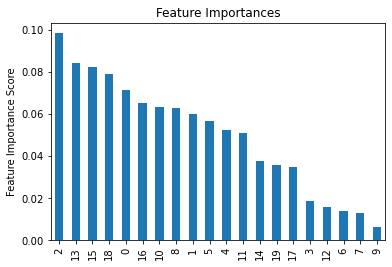

<Figure size 2000x1000 with 0 Axes>

In [8]:
gb = GradientBoostingClassifier(random_state=50, min_samples_split = 6, min_samples_leaf = 3, max_depth = 4, n_estimators = 100)

gb = gb.fit(X_train_pca, y_train) 
gb.score(X_train_pca, y_train) 

# gb.feature_importances_
feat_imp = pd.Series(gb.feature_importances_, X_train_pca.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

test_output = pd.DataFrame(gb.predict(X_test_pca), index = X_test_pca.index, columns = ['pred_Y'])

test_output.head()
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Fraction of correct classification ')
gb.score(X_test_pca, y_test) 

0.975

<AxesSubplot:title={'center':'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

2    0.08
10   0.08
18   0.07
0    0.07
16   0.07
1    0.06
5    0.05
15   0.05
4    0.05
13   0.05
14   0.04
19   0.04
dtype: float64

pred_Y
72     1.00
69     1.00
232    1.00
39     1.00
141    1.00

pred_Y  target
72     1.00    1.00
69     1.00    1.00
232    1.00    1.00
39     1.00    1.00
141    1.00    0.00

Fraction of correct classification 


0.68

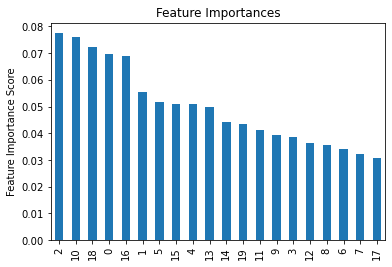

<Figure size 2000x1000 with 0 Axes>

In [9]:
rf = RandomForestClassifier(random_state=50, min_samples_leaf = 4, max_features = "sqrt", n_estimators = 1000)

rf = rf.fit(X_train_pca, y_train) 
rf.score(X_train_pca, y_train) 

# rf.feature_importances_
feat_imp = pd.Series(rf.feature_importances_, X_train_pca.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

test_output = pd.DataFrame(rf.predict(X_test_pca), index = X_test_pca.index, columns = ['pred_Y'])

test_output.head()
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Fraction of correct classification ')
rf.score(X_test_pca, y_test) 


In [10]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [11]:
correl = X_train.merge(y_train, left_index = True, right_index = True).corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [12]:
X_train_pca.merge(y_train, left_index = True, right_index = True).corr()

0     1     2     3     4     5     6     7     8     9  ...    11  \
0       1.00 -0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00  ...  0.00   
1      -0.00  1.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00  ...  0.00   
2       0.00 -0.00  1.00 -0.00 -0.00 -0.00 -0.00  0.00  0.00 -0.00  ... -0.00   
3      -0.00 -0.00 -0.00  1.00 -0.00  0.00 -0.00  0.00 -0.00  0.00  ... -0.00   
4       0.00  0.00 -0.00 -0.00  1.00 -0.00  0.00  0.00  0.00 -0.00  ...  0.00   
5      -0.00  0.00 -0.00  0.00 -0.00  1.00 -0.00  0.00 -0.00  0.00  ...  0.00   
6       0.00 -0.00 -0.00 -0.00  0.00 -0.00  1.00  0.00  0.00 -0.00  ...  0.00   
7      -0.00 -0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  ...  0.00   
8       0.00  0.00  0.00 -0.00  0.00 -0.00  0.00  0.00  1.00  0.00  ...  0.00   
9      -0.00 -0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00  0.00  1.00  ...  0.00   
10     -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00  ...  0.00   
11      0.00  0.00 -0.00 -0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  1.00   
12     -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00  0.00  ...  0.00   
13     -0.00 -0.00  0.00 -0.00  0.00  0.00  0.00  0.00 -0.00  0.00  ...  0.00   
14     -0.00 -0.00  0.00  0.00  0.00  0.00 -0.00  0.00  0.00  0.00  ...  0.00   
15      0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00  ...  0.00   
16      0.00 -0.00 -0.00  0.00 -0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
17     -0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00  0.00 -0.00  0.00  ...  0.00   
18     -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00 -0.00  ... -0.00   
19     -0.00  0.00 -0.00 -0.00  0.00  0.00  0.00  0.00 -0.00 -0.00  ...  0.00   
target  0.18 -0.00  0.19  0.03 -0.12  0.09 -0.03 -0.00 -0.04 -0.02  ... -0.08   

          12    13    14    15    16    17    18    19  target  
0      -0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00    0.18  
1      -0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00   -0.00  
2      -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00 -0.00    0.19  
3      -0.00 -0.00  0.00  0.00  0.00 -0.00  0.00 -0.00    0.03  
4      -0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00  0.00   -0.12  
5      -0.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00    0.09  
6      -0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00  0.00   -0.03  
7      -0.00  0.00  0.00 -0.00  0.00  0.00 -0.00  0.00   -0.00  
8      -0.00 -0.00  0.00  0.00  0.00 -0.00  0.00 -0.00   -0.04  
9       0.00  0.00  0.00 -0.00  0.00  0.00 -0.00 -0.00   -0.02  
10      0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00    0.15  
11      0.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00   -0.08  
12      1.00  0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00   -0.03  
13      0.00  1.00 -0.00  0.00  0.00  0.00  0.00 -0.00   -0.11  
14      0.00 -0.00  1.00  0.00 -0.00  0.00  0.00  0.00   -0.11  
15      0.00  0.00  0.00  1.00  0.00  0.00  0.00 -0.00   -0.14  
16     -0.00  0.00 -0.00  0.00  1.00 -0.00 -0.00 -0.00   -0.10  
17     -0.00  0.00  0.00  0.00 -0.00  1.00 -0.00  0.00    0.06  
18      0.00  0.00  0.00  0.00 -0.00 -0.00  1.00  0.00    0.23  
19     -0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00  1.00   -0.10  
target -0.03 -0.11 -0.11 -0.14 -0.10  0.06  0.23 -0.10    1.00  

[21 rows x 21 columns]

In [13]:
model = LogisticRegression(fit_intercept = True, solver='saga', multi_class = 'auto', penalty = 'l1', C = 0.5, max_iter = 1000)

model.fit(X_train_pca, y_train) 
model.score(X_train_pca, y_train) 

test_output = pd.DataFrame(model.predict(X_test_pca), index = X_test_pca.index, columns = ['pred_Y'])

test_output.head()
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Fraction of correct classification ')
model.score(X_test_pca, y_test)



LogisticRegression(C=0.5, max_iter=1000, penalty='l1', solver='saga')

0.75

pred_Y
72     1.00
69     1.00
232    1.00
39     1.00
141    1.00

pred_Y  target
72     1.00    1.00
69     1.00    1.00
232    1.00    1.00
39     1.00    1.00
141    1.00    0.00

Fraction of correct classification 


0.68